% code from https://machinelearningmastery.com/how-to-improve-performance-with-transfer-learning-for-deep-learning-neural-networks/

In [40]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# problem 1

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=1)

Using TensorFlow backend.
/anaconda3/envs/cpsml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/cpsml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/cpsml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/cpsml/lib/python3.7/site-packages/tensorflo

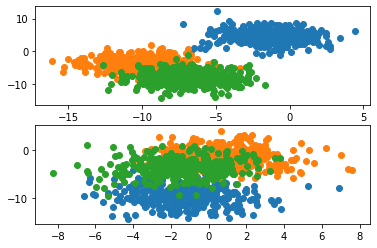

In [7]:
# plot of blobs multiclass classification problems 1 and 2
from sklearn.datasets.samples_generator import make_blobs
from numpy import where
from matplotlib import pyplot

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# generate samples for blobs problem with a given random seed
def samples_for_seed(seed):
    # generate samples
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=seed)
    return X, y

# create a scatter plot of points colored by class value
def plot_samples(X, y, classes=3):
    # plot points for each class
    for i in range(classes):
        # select indices of points with each class label
        samples_ix = where(y == i)
        # plot points for this class with a given color
        pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])

# generate multiple problems
n_problems = 2
for i in range(1, n_problems+1):
    # specify subplot
    pyplot.subplot(210 + i)
    # generate samples
    X, y = samples_for_seed(i)
    # scatter plot of samples
    plot_samples(X, y)
# plot figure
pyplot.show()

In [8]:
# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
    # generate samples
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=seed)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [9]:
# fit mlp model on problem 1 and save model to file
# prepare data
trainX, trainy, testX, testy = samples_for_seed(1)

In [14]:
# define and fit model on a training dataset
def fit_model(trainX, trainy, testX, testy):
    # define model
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
    return model, history

In [15]:
# fit model on train dataset
model, history = fit_model(trainX, trainy, testX, testy)

In [16]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.924, Test: 0.926


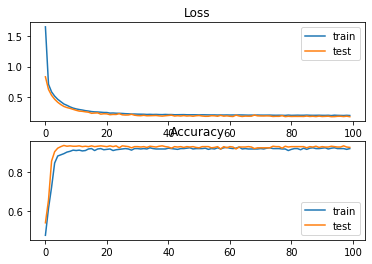

In [24]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [27]:
# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy):
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot loss during training
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    # plot accuracy during training
    pyplot.subplot(212)
    pyplot.title('Accuracy')
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_acc'], label='test')
    pyplot.legend()
    pyplot.show()

Train: 0.924, Test: 0.926


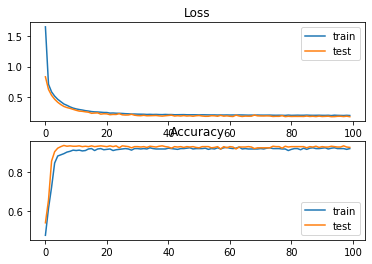

In [28]:
# evaluate model behavior
summarize_model(model, history, trainX, trainy, testX, testy)

In [29]:
# save model to file
model.save('model.h5')

# problem 2

In [31]:
# prepare data
trainX, trainy, testX, testy = samples_for_seed(2)

Train: 0.810, Test: 0.830


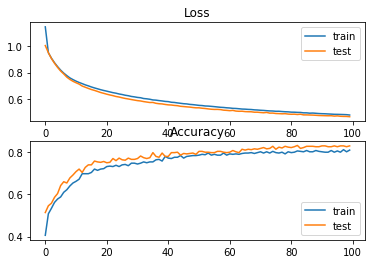

In [33]:
# fit mlp model on problem 2 and save model to file
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
    # generate samples
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=seed)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# define and fit model on a training dataset
def fit_model(trainX, trainy, testX, testy):
    # define model
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
    return model, history

# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy):
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot loss during training
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    # plot accuracy during training
    pyplot.subplot(212)
    pyplot.title('Accuracy')
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_acc'], label='test')
    pyplot.legend()
    pyplot.show()

# prepare data
trainX, trainy, testX, testy = samples_for_seed(2)
# fit model on train dataset
model, history = fit_model(trainX, trainy, testX, testy)
# evaluate model behavior
summarize_model(model, history, trainX, trainy, testX, testy)

# transfer learning on problem 2

Train: 0.806, Test: 0.820


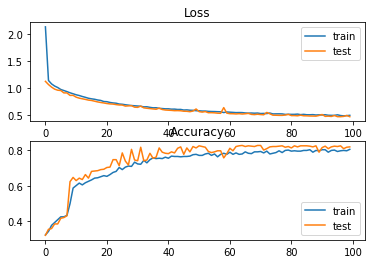

In [38]:
# transfer learning with mlp model on problem 2
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import load_model
from matplotlib import pyplot

# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
    # generate samples
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=seed)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# load and re-fit model on a training dataset
def fit_model(trainX, trainy, testX, testy):
    # load model
    model = load_model('model.h5')
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    # re-fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
    return model, history

# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy):
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot loss during training
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    # plot accuracy during training
    pyplot.subplot(212)
    pyplot.title('Accuracy')
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_acc'], label='test')
    pyplot.legend()
    pyplot.show()

# prepare data
trainX, trainy, testX, testy = samples_for_seed(2)
# fit model on train dataset
model, history = fit_model(trainX, trainy, testX, testy)
# evaluate model behavior
summarize_model(model, history, trainX, trainy, testX, testy)

Standalone 0.793 (0.060)
Transfer (fixed=0) 0.819 (0.006)
Transfer (fixed=1) 0.817 (0.008)
Transfer (fixed=2) 0.792 (0.004)


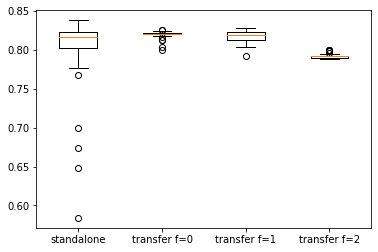

In [39]:
# compare standalone mlp model performance to transfer learning
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import load_model
from matplotlib import pyplot
from numpy import mean
from numpy import std

# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
    # generate samples
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=seed)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# define and fit model on a training dataset
def fit_model(trainX, trainy):
    # define model
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=100, verbose=0)
    return model

# repeated evaluation of a standalone model
def eval_standalone_model(trainX, trainy, testX, testy, n_repeats):
    scores = list()
    for _ in range(n_repeats):
        # define and fit a new model on the train dataset
        model = fit_model(trainX, trainy)
        # evaluate model on test dataset
        _, test_acc = model.evaluate(testX, testy, verbose=0)
        scores.append(test_acc)
    return scores

# repeated evaluation of a model with transfer learning
def eval_transfer_model(trainX, trainy, testX, testy, n_fixed, n_repeats):
    scores = list()
    for _ in range(n_repeats):
        # load model
        model = load_model('model.h5')
        # mark layer weights as fixed or not trainable
        for i in range(n_fixed):
            model.layers[i].trainable = False
        # re-compile model
        model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
        # fit model on train dataset
        model.fit(trainX, trainy, epochs=100, verbose=0)
        # evaluate model on test dataset
        _, test_acc = model.evaluate(testX, testy, verbose=0)
        scores.append(test_acc)
    return scores

# prepare data for problem 2
trainX, trainy, testX, testy = samples_for_seed(2)
n_repeats = 30
dists, dist_labels = list(), list()

# repeated evaluation of standalone model
standalone_scores = eval_standalone_model(trainX, trainy, testX, testy, n_repeats)
print('Standalone %.3f (%.3f)' % (mean(standalone_scores), std(standalone_scores)))
dists.append(standalone_scores)
dist_labels.append('standalone')

# repeated evaluation of transfer learning model, vary fixed layers
n_fixed = 3
for i in range(n_fixed):
    scores = eval_transfer_model(trainX, trainy, testX, testy, i, n_repeats)
    print('Transfer (fixed=%d) %.3f (%.3f)' % (i, mean(scores), std(scores)))
    dists.append(scores)
    dist_labels.append('transfer f='+str(i))

# box and whisker plot of score distributions
pyplot.boxplot(dists, labels=dist_labels)
pyplot.show()